In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# ファイルのパス（マイドライブ配下のフォルダも含めて）
file_path = '/content/drive/MyDrive/data.csv  のコピー'

# 読み込み
# データは著作権の都合で公開していません。
# GitHubにはデータを置いていないため、以下は実行時に各自のローカルに用意してください
df = pd.read_csv("employee_data.csv")


# 確認
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RemoteWork,MonthlyIncome,StressRating,WelfareBenefits,InHouseFacility,ExternalFacility,ExtendedLeave,FlexibleWork,StressSelfReported,Year
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,1,5224,4,1,0,0,0,0,1,2023
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,3,6863,2,4,1,0,0,1,1,2023
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,7612,3,2,1,0,0,0,1,2023
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,2,11245,1,4,1,1,1,1,1,2023
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,2,3029,3,2,0,0,0,0,3,2023


EDA

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# CSV読み込み
df = pd.read_csv("/content/drive/MyDrive/data.csv  のコピー")
# 基本情報
print("▶ データ構造:")
print(df.shape)
print("\n▶ カラム一覧:")
print(df.columns)
print("\n▶ 欠損値:")
print(df.isnull().sum())


▶ データ構造:
(1470, 44)

▶ カラム一覧:
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'PerformanceIndex',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyAchievement', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'HowToEmploy', 'Incentive', 'RemoteWork', 'MonthlyIncome',
       'StressRating', 'WelfareBenefits', 'InHouseFacility',
       'ExternalFacility', 'ExtendedLeave', 'FlexibleWork',
       'StressSelfReported', 'Year'],
      dtype='object')

▶ 欠損値:
Age                         0
Attrition                   0
BusinessTrav

In [ ]:
import matplotlib.font_manager as fm

# 使用可能なフォントの一覧を見る
for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    if 'jp' in font.lower() or 'noto' in font.lower() or 'ipa' in font.lower():
        print(font)

/usr/share/fonts/opentype/ipafont-mincho/ipamp.ttf
/usr/share/fonts/opentype/ipafont-mincho/ipam.ttf
/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf
/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.



▶ Attrition割合:
Attrition
No     0.838095
Yes    0.161905
Name: proportion, dtype: float64


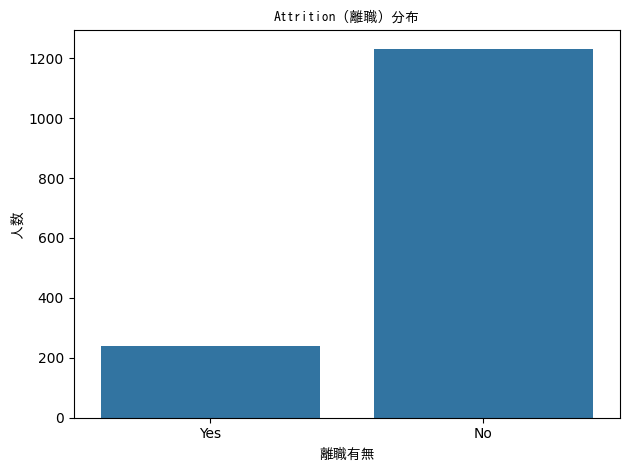

In [ ]:



# 離職の割合確認
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォント（IPAフォント）のインストール
!apt -y install fonts-ipafont-gothic

# matplotlibで日本語フォントを使う設定
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAGothic'

# フォントの設定（ゴシック体）
jp_font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipag.ttf'
jp_font = fm.FontProperties(fname=jp_font_path)


attr_counts = df['Attrition'].value_counts(normalize=True)
print("\n▶ Attrition割合:")
print(attr_counts)

# グラフ表示
sns.countplot(data=df, x='Attrition')
plt.title('Attrition（離職）分布', fontproperties=jp_font)
plt.xlabel('離職有無', fontproperties=jp_font)
plt.ylabel('人数', fontproperties=jp_font)
plt.tight_layout()
plt.show()


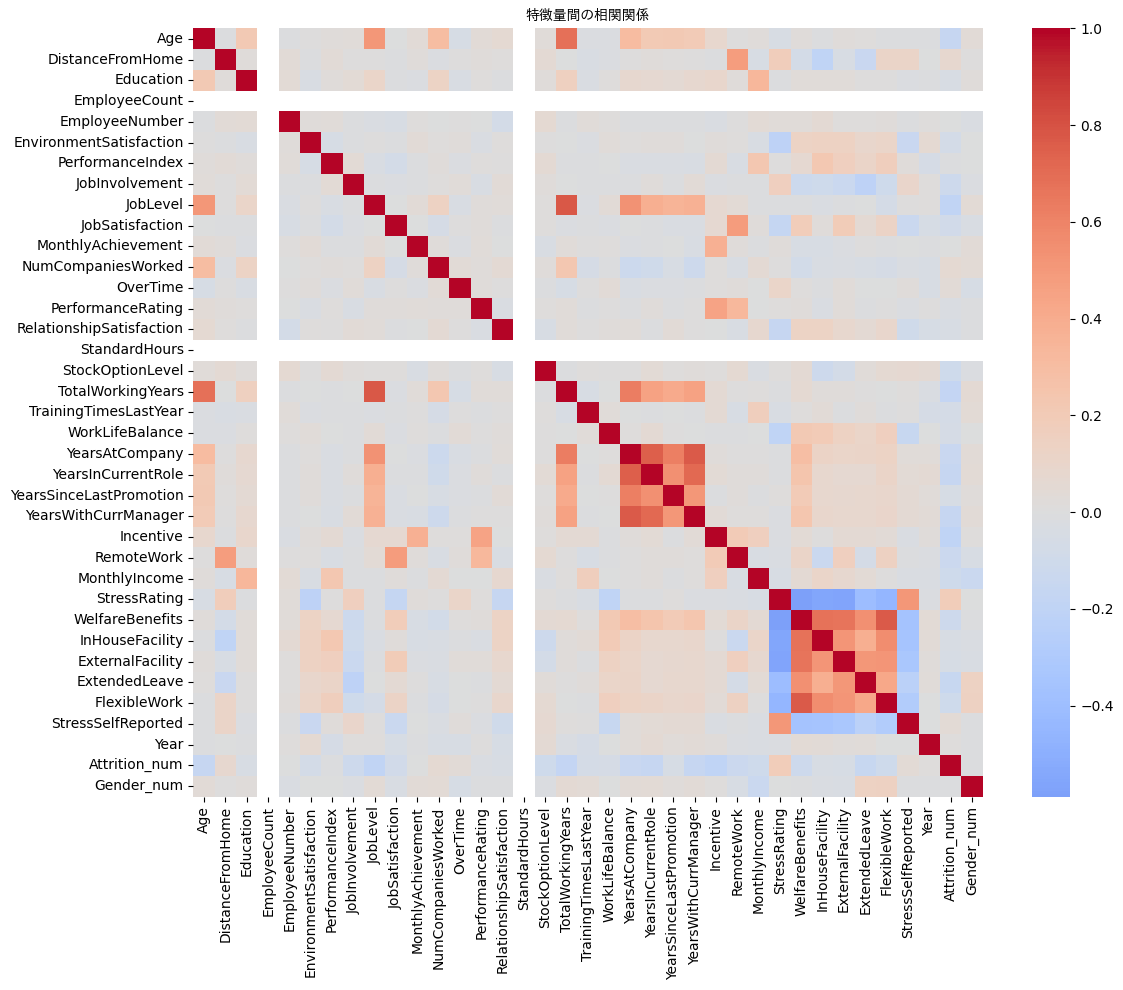

In [ ]:
# 可視化専用のコピー
df_vis = df.copy()

# 可視化用の数値化（元の df には影響なし）
df_vis['Attrition_num'] = df_vis['Attrition'].map({'Yes':1, 'No':0})
df_vis['Gender_num'] = df_vis['Gender'].map({'Female':1, 'Male':0})

# 数値列のみ抽出
numeric_df = df_vis.select_dtypes(include='number')

# 相関ヒートマップ
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title('特徴量間の相関関係', fontproperties=jp_font)
plt.tight_layout()
plt.show()


▶ JobSatisfaction別の離職率（％）


Attrition,Stay,Leave
JobSatisfaction,,
1,78.546713,21.453287
2,83.928571,16.071429
3,81.900452,18.099548
4,88.888889,11.111111


/tmp/ipython-input-41-734178560.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


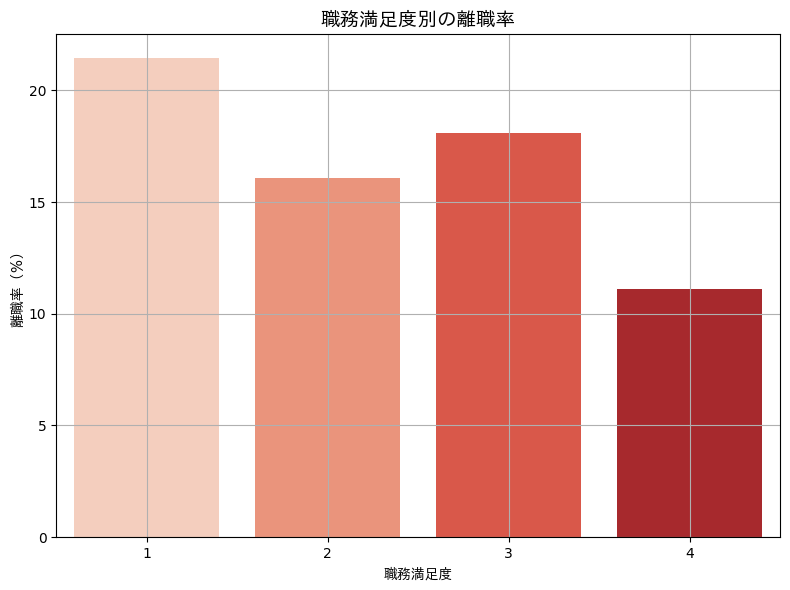

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cross_tab = pd.crosstab(df['JobSatisfaction'], df['Attrition'], normalize='index') * 100
cross_tab = cross_tab.rename(columns={'No': 'Stay', 'Yes': 'Leave'})
print("▶ JobSatisfaction別の離職率（％）")
display(cross_tab)

# 離職率だけを描く
plt.figure(figsize=(8,6))
sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')

plt.title('職務満足度別の離職率', fontproperties=jp_font, fontsize=14)
plt.xlabel('職務満足度', fontproperties=jp_font)
plt.ylabel('離職率（％）', fontproperties=jp_font)
plt.tight_layout()
plt.grid(True)
plt.show()


Attrition,Stay,Leave
WorkLifeBalance,,
1,71.250000,28.750000
2,83.139535,16.860465
3,85.330347,14.669653
4,83.006536,16.993464


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


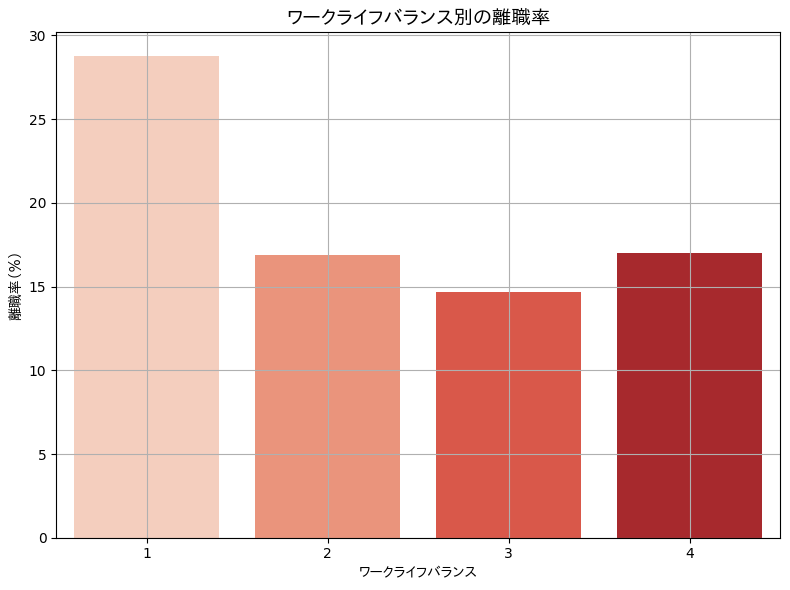

Attrition,Stay,Leave
EnvironmentSatisfaction,,
1,77.464789,22.535211
2,83.972125,16.027875
3,85.209713,14.790287
4,86.322870,13.677130


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


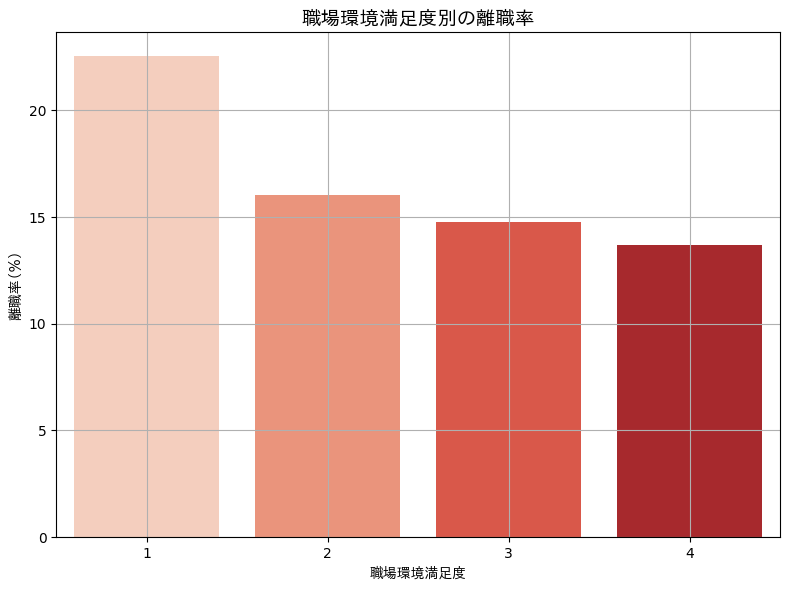

Attrition,Stay,Leave
RemoteWork,,
0,56.818182,43.181818
1,75.471698,24.528302
2,83.979328,16.020672
3,86.206897,13.793103
4,85.209003,14.790997
5,91.044776,8.955224


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


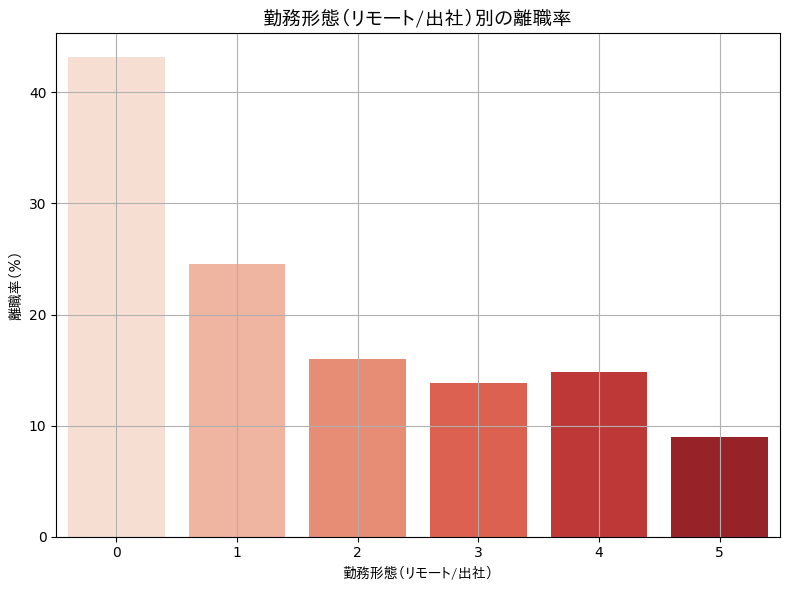

Attrition,Stay,Leave
StressRating,,
1,85.185185,14.814815
2,87.397709,12.602291
3,88.212928,11.787072
4,60.839161,39.160839
5,32.142857,67.857143


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


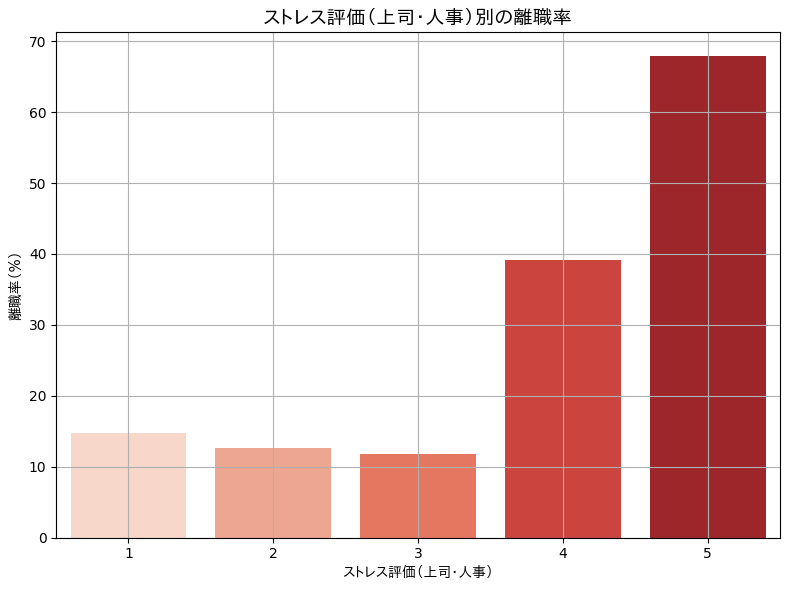

Attrition,Stay,Leave
FlexibleWork,,
0,79.696970,20.303030
1,87.160494,12.839506


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


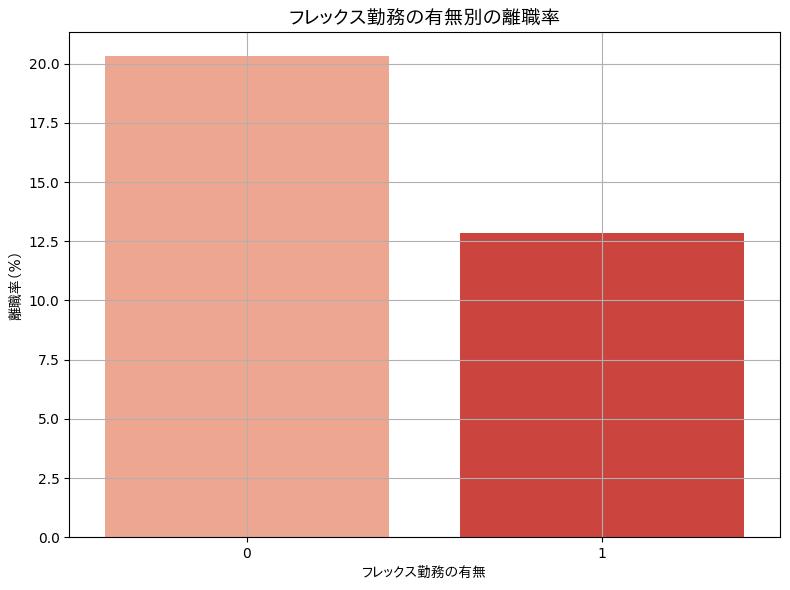

Attrition,Stay,Leave
PerformanceRating,,
1,83.650190,16.349810
2,81.880734,18.119266
3,84.242424,15.757576
4,86.231884,13.768116


/tmp/ipython-input-42-1352536633.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')


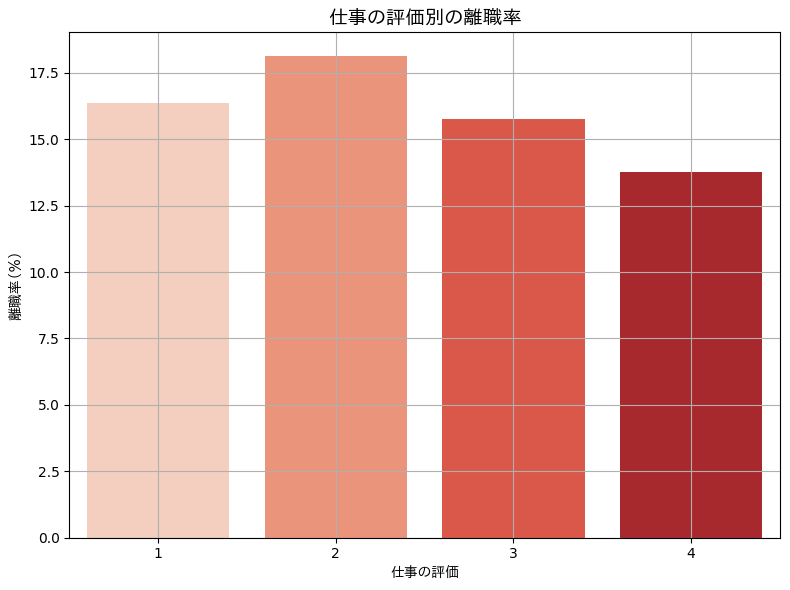

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Google Colab用の日本語フォント設定
!apt-get -y install fonts-ipafont-gothic > /dev/null
plt.rcParams['font.family'] = 'IPAGothic'  # 日本語対応フォント

# 日本語フォントオブジェクト（関数で使う用）
jp_font = fm.FontProperties(fname='/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf')


# グラフ描画用関数（再利用できるように関数化！）
def plot_attrition_rate_by_category(df, colname, title_jp):
    # クロス集計で離職率を％表示
    cross_tab = pd.crosstab(df[colname], df['Attrition'], normalize='index') * 100
    cross_tab = cross_tab.rename(columns={'No': 'Stay', 'Yes': 'Leave'})
    print()
    display(cross_tab)
    # グラフ
    plt.figure(figsize=(8, 6))
    sns.barplot(x=cross_tab.index, y=cross_tab['Leave'], palette='Reds')
    plt.title(f'{title_jp}別の離職率', fontproperties=jp_font, fontsize=14)
    plt.xlabel(title_jp, fontproperties=jp_font)
    plt.ylabel('離職率（％）', fontproperties=jp_font)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 各カテゴリ変数について描画
plot_attrition_rate_by_category(df, 'WorkLifeBalance', 'ワークライフバランス')
plot_attrition_rate_by_category(df, 'EnvironmentSatisfaction', '職場環境満足度')
plot_attrition_rate_by_category(df, 'RemoteWork', '勤務形態（リモート/出社）')
plot_attrition_rate_by_category(df, 'StressRating', 'ストレス評価（上司・人事）')
plot_attrition_rate_by_category(df, 'FlexibleWork', 'フレックス勤務の有無')
plot_attrition_rate_by_category(df, 'PerformanceRating', '仕事の評価')


特徴量エンジニアリング

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# コピーして作業
df_proc = df.copy()

# --- ① 不要カラムの削除 ---
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'Year']
df_proc.drop(columns=drop_cols, inplace=True)

# --- ② ラベルエンコーディング（2値カテゴリ） ---
label_cols = ['Gender', 'OverTime', 'ExtendedLeave', 'FlexibleWork']
for col in label_cols:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col])

# --- ③ One-Hot Encoding（多値カテゴリ） ---
onehot_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'HowToEmploy']
df_proc = pd.get_dummies(df_proc, columns=onehot_cols, drop_first=True)

# --- ④ 新しい特徴量の作成 ---
df_proc['TenureRatio'] = df_proc['YearsAtCompany'] / (df_proc['TotalWorkingYears'] + 1e-3)  # 0除け
df_proc['StressCombined'] = (df_proc['StressRating'] + df_proc['StressSelfReported']) / 2

# --- ⑤ 目的変数の数値化 ---
df_proc['Attrition'] = df_proc['Attrition'].map({'No': 0, 'Yes': 1})

# --- ⑥ スケーリング準備（例：月収など） ---
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_proc['MonthlyIncome'] = scaler.fit_transform(df_proc[['MonthlyIncome']])


モデル構築

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 説明変数・目的変数に分割
X = df_proc.drop('Attrition', axis=1)
y = df_proc['Attrition']

# データ分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# モデル一覧
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 各モデルを学習・評価
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, target_names=["Stay", "Leave"]))
    print("AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print(confusion_matrix(y_test, y_pred))
    print()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== LogisticRegression ===
              precision    recall  f1-score   support

        Stay       0.90      0.97      0.93       246
       Leave       0.74      0.42      0.53        48

    accuracy                           0.88       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294

AUC: 0.8165650406504065
[[239   7]
 [ 28  20]]

=== RandomForest ===
              precision    recall  f1-score   support

        Stay       0.86      0.99      0.92       246
       Leave       0.78      0.15      0.25        48

    accuracy                           0.85       294
   macro avg       0.82      0.57      0.58       294
weighted avg       0.84      0.85      0.81       294

AUC: 0.8234247967479674
[[244   2]
 [ 41   7]]

=== XGBoost ===
              precision    recall  f1-score   support

        Stay       0.88      0.97      0.92       246
       Leave       0.65      0.31      0.42        48

    accuracy          

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:21:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


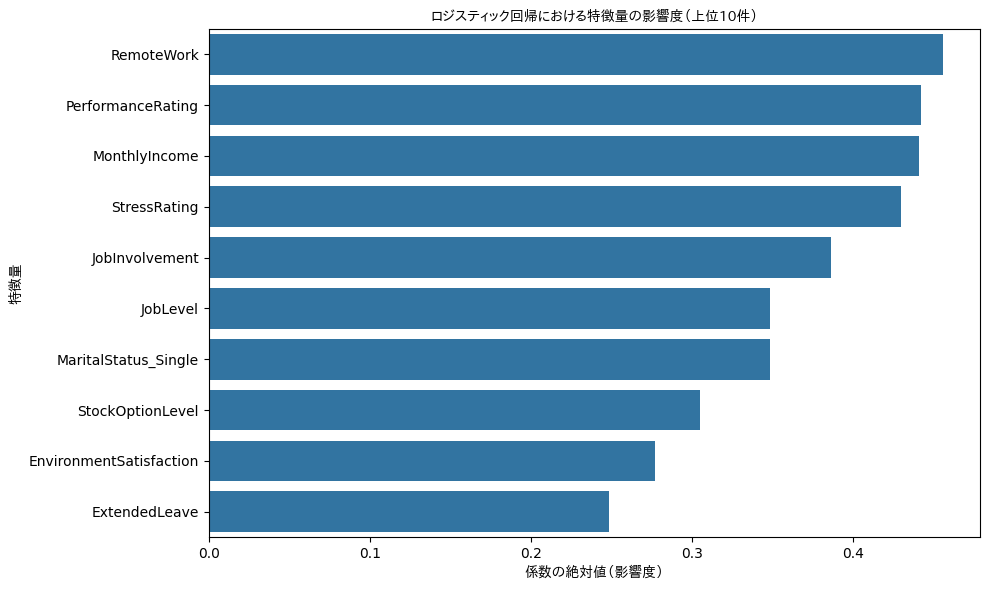

In [ ]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰の再定義・学習
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# 係数の取り出しと可視化
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
})
coeff_df['AbsCoefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='AbsCoefficient', ascending=False)

# グラフ表示（日本語対応フォントを使ってね）
plt.figure(figsize=(10, 6))
sns.barplot(x='AbsCoefficient', y='Feature', data=coeff_df.head(10))
plt.title("ロジスティック回帰における特徴量の影響度（上位10件）", fontproperties=jp_font)
plt.xlabel("係数の絶対値（影響度）", fontproperties=jp_font)
plt.ylabel("特徴量", fontproperties=jp_font)
plt.tight_layout()
plt.show()


KPI

In [ ]:
print("離職率：", df['Attrition'].value_counts(normalize=True)['Yes'] * 100)
print("ストレス自己評価平均：", df['StressRating'].mean())
print("リモート勤務率：", (df['RemoteWork'] > 0).mean() * 100)
print("月収中央値：", df['MonthlyIncome'].median())
print("JobSatisfaction平均：", df['JobSatisfaction'].mean())


離職率： 16.19047619047619
ストレス自己評価平均： 2.4993197278911565
リモート勤務率： 97.00680272108843
月収中央値： 6814.5
JobSatisfaction平均： 2.7285714285714286


In [ ]:
df['MonthlyIncome'].describe()


,MonthlyIncome
count,1470.000000
mean,6922.257143
std,1977.100821
min,1329.000000
25%,5542.250000
50%,6814.500000
75%,8264.750000
max,12612.000000


<Axes: xlabel='MonthlyIncome', ylabel='Count'>

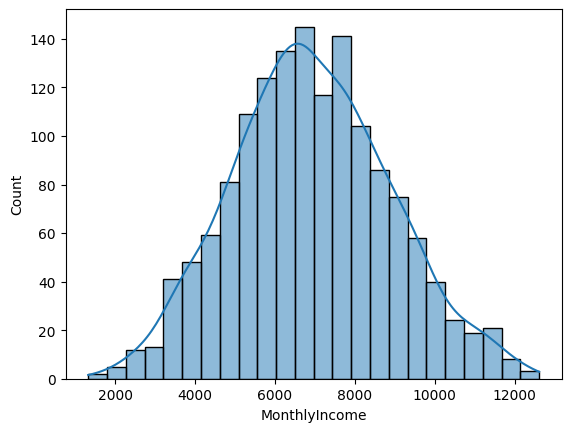

In [ ]:
sns.histplot(df['MonthlyIncome'], kde=True)


In [ ]:
# 入社3年未満の社員だけ抽出
early_employees = df[df['YearsAtCompany'] < 3]

# その中で離職者の割合を計算
early_attrition_rate = early_employees['Attrition'].value_counts(normalize=True).get('Yes', 0) * 100

print(f"早期離職率（3年未満）: {early_attrition_rate:.2f}%")


早期離職率（3年未満）: 28.45%
